<a href="https://colab.research.google.com/github/nhinguyen-lab/dataproject/blob/main/NBA_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


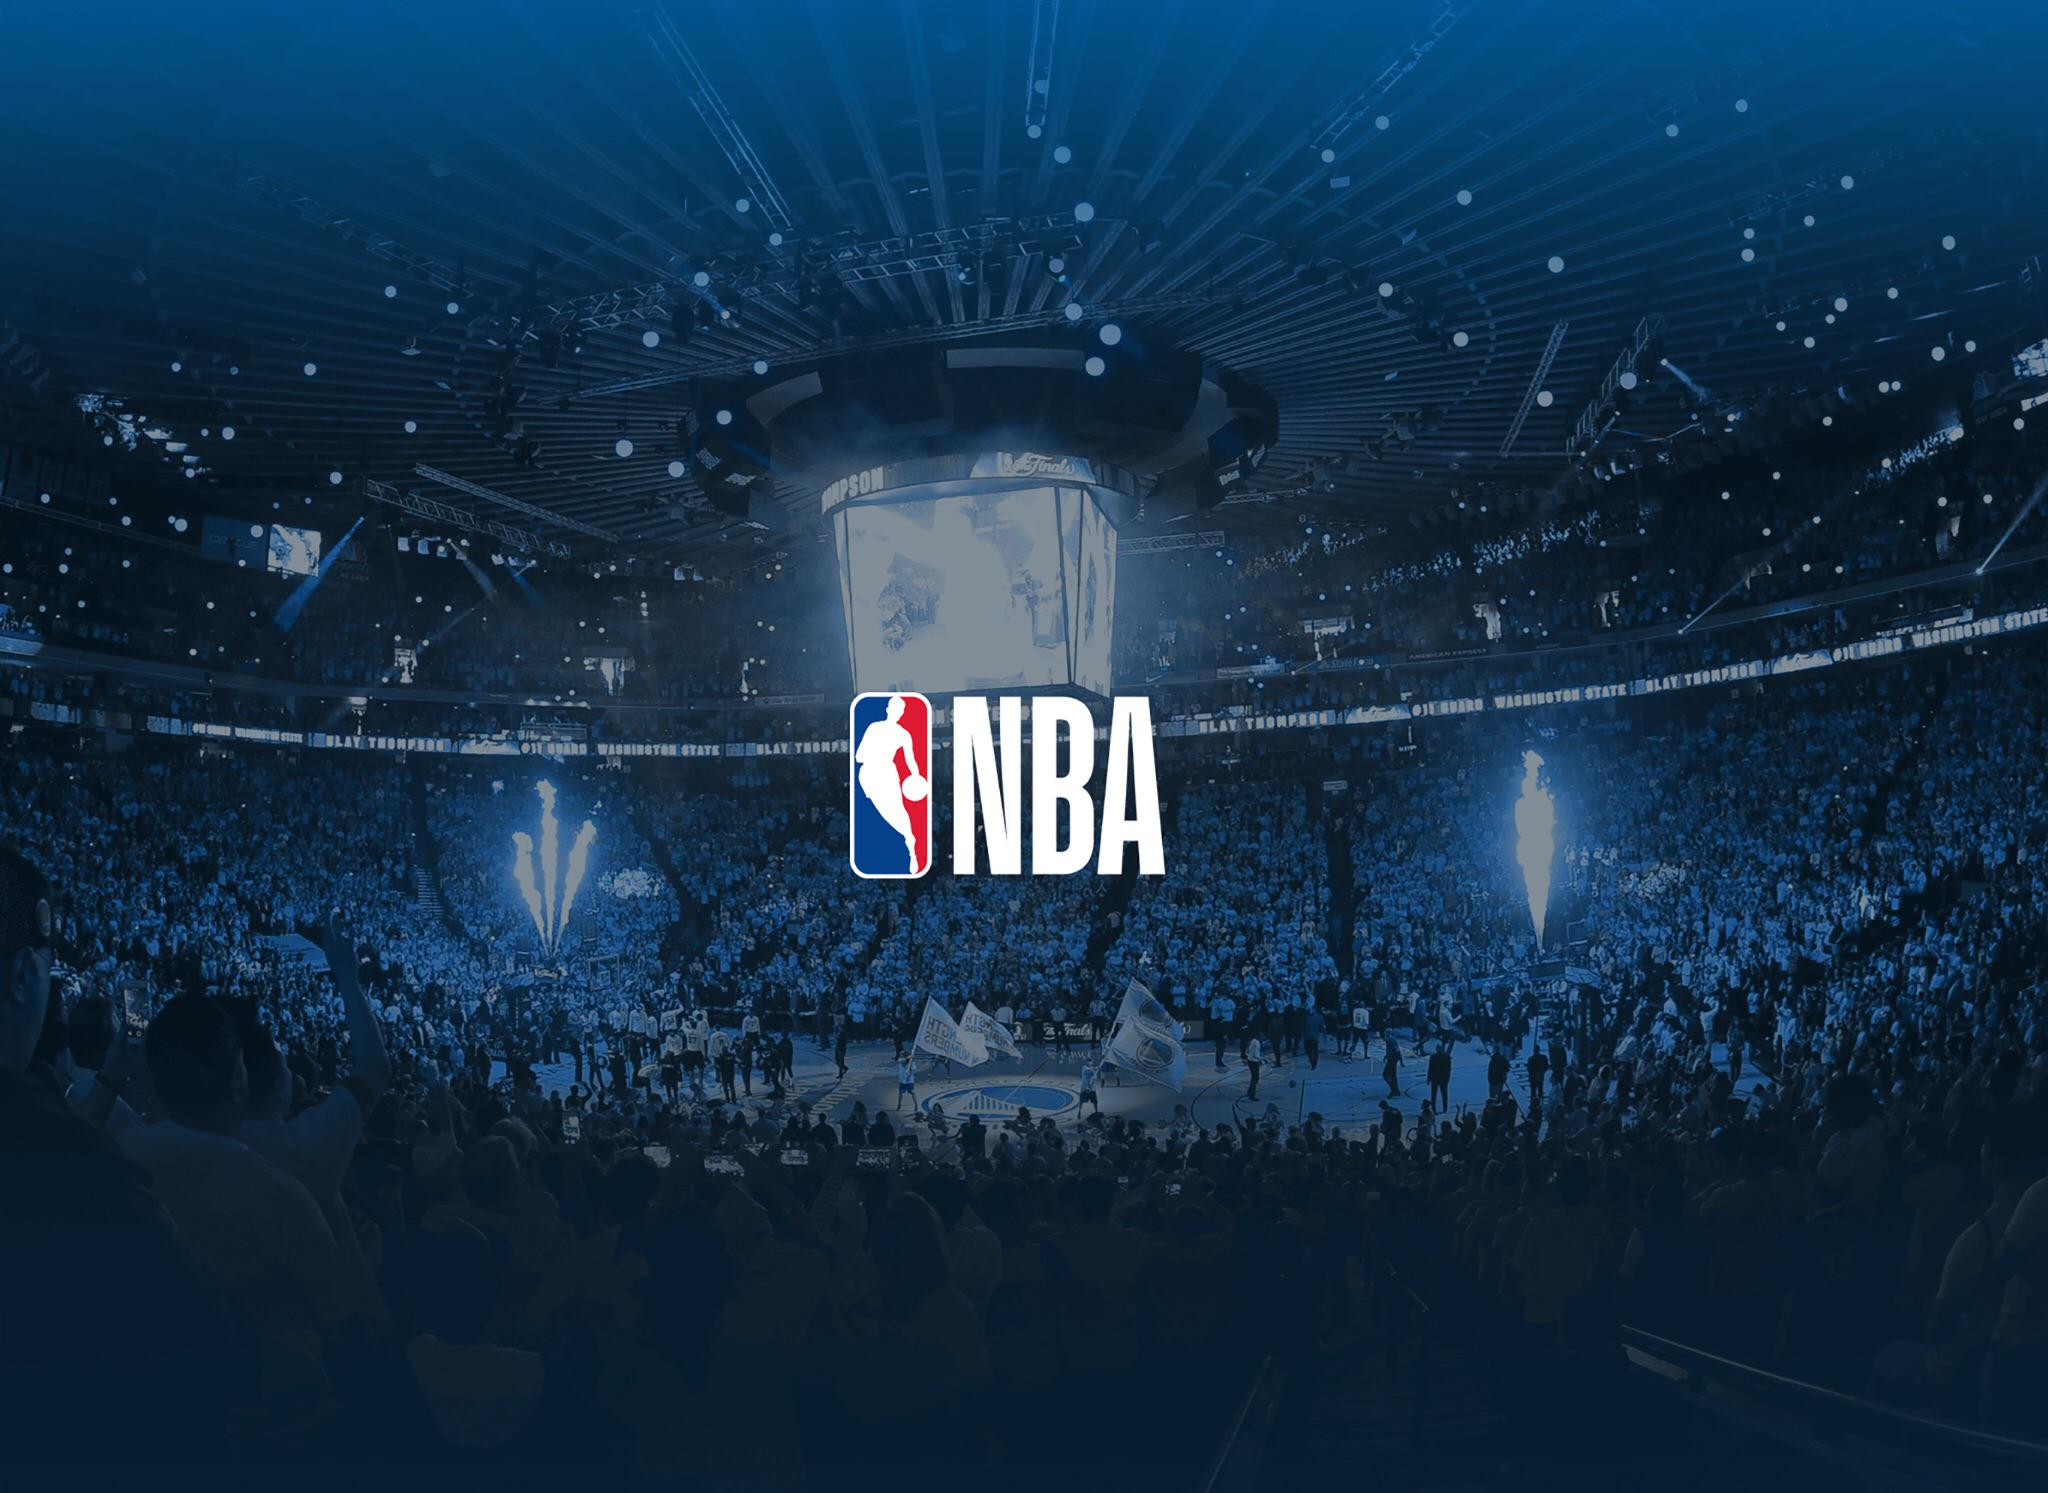

#1.Preparation and Data Overview

Data Overview

In [ ]:
import pandas as pd
nba_ss = pd.read_csv('/content/drive/MyDrive/Milestone project-Nhi/seasons.csv')
nba_players = pd.read_csv('/content/drive/MyDrive/Milestone project-Nhi/players.csv')

In [ ]:
print(nba_ss.shape)
print(nba_players.shape)

(24691, 53)
(4550, 8)


The nba season dataset contains 24691 rows and 53 columns

The nba player dataset contains 4550 rows and 8 columns

In [ ]:
nba_ss.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [ ]:
#Data field :
# Pos : position
# C : center
# F : forward
# PF : power forward
# SF : small forward
# PG : point guard
# SG : shooting guard


Cleaning the unessary columns and handle NaN values

In [ ]:
nba_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%        20792 non-null  float64
 19  TOV%        19582 non-nul

The nba season dataset include data types such as

- Number : float
- String : object

Besides, there are 2 columns that have Null values

-   blanl &  blank2

Data Cleaning and Preparing

In [ ]:
#1. Drop col Unnamed
nba_ss = nba_ss.drop(columns = 'Unnamed: 0')



In [ ]:
#2. Create a temporary table to work with NBA season 1950-2017
nba_temp = nba_ss.drop(columns = ['MP','GS','PER','ORB','DRB','PF','DBPM','BPM','VORP','DWS','WS','WS/48','blank2','blanl','ORB%','DRB%','STL%','BLK%','USG%','OWS','TS%','3PAr','OWS','OBPM','ORB','DRB'])
nba_temp

,Year,Player,Pos,Age,Tm,G,FTr,TRB%,AST%,TOV%,...,eFG%,FT,FTA,FT%,TRB,AST,STL,BLK,TOV,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,0.467,NaN,NaN,NaN,...,0.279,170.0,241.0,0.705,NaN,176.0,NaN,NaN,NaN,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,0.387,NaN,NaN,NaN,...,0.372,75.0,106.0,0.708,NaN,109.0,NaN,NaN,NaN,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,0.259,NaN,NaN,NaN,...,0.349,90.0,129.0,0.698,NaN,140.0,NaN,NaN,NaN,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,0.395,NaN,NaN,NaN,...,0.256,19.0,34.0,0.559,NaN,20.0,NaN,NaN,NaN,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,0.378,NaN,NaN,NaN,...,0.256,17.0,31.0,0.548,NaN,20.0,NaN,NaN,NaN,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,0.442,12.9,9.1,10.9,...,0.571,133.0,196.0,0.679,405.0,99.0,62.0,58.0,65.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,0.247,13.2,12.2,10.2,...,0.494,22.0,39.0,0.564,124.0,42.0,7.0,21.0,20.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.161,17.6,5.3,8.3,...,0.323,3.0,5.0,0.600,35.0,4.0,2.0,5.0,3.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,0.181,8.0,6.1,14.4,...,0.473,31.0,40.0,0.775,125.0,36.0,15.0,16.0,40.0,240.0


In [ ]:
#3.With the temp table, drop columns with NaN values
nba_temp =  nba_temp.dropna(subset=['Year','Player','Pos','Age','Tm','G'])

In [ ]:
#4.Change data type to int64
import numpy as np
nba_temp['Year'] = nba_temp['Year'].astype(np.int64)
nba_temp['Age'] = nba_temp['Age'].astype(np.int64)
nba_temp['PTS'] = nba_temp['PTS'].astype(np.int64)
nba_temp['G'] = nba_temp['G'].astype(np.int64)


<ipython-input-6-f81725465139>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_temp['Year'] = nba_temp['Year'].astype(np.int64)
<ipython-input-6-f81725465139>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_temp['Age'] = nba_temp['Age'].astype(np.int64)
<ipython-input-6-f81725465139>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [ ]:
#5. Checking if datatype is changed
nba_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24616 entries, 0 to 24690
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    24616 non-null  int64  
 1   Player  24616 non-null  object 
 2   Pos     24616 non-null  object 
 3   Age     24616 non-null  int64  
 4   Tm      24616 non-null  object 
 5   G       24616 non-null  int64  
 6   FTr     24517 non-null  float64
 7   TRB%    21571 non-null  float64
 8   AST%    22555 non-null  float64
 9   TOV%    19582 non-null  float64
 10  FG      24616 non-null  float64
 11  FGA     24616 non-null  float64
 12  FG%     24517 non-null  float64
 13  3P      18927 non-null  float64
 14  3PA     18927 non-null  float64
 15  3P%     15416 non-null  float64
 16  2P      24616 non-null  float64
 17  2PA     24616 non-null  float64
 18  2P%     24488 non-null  float64
 19  eFG%    24517 non-null  float64
 20  FT      24616 non-null  float64
 21  FTA     24616 non-null  float64
 22

In [ ]:
#6. checking if there is any duplicates
nba_temp.duplicated().sum()

0

#2. Analysis

The dataset contains:

-Numbers of players : 3916

-Numbers of year 1950 - 2017 - 68 years  

-Numbers of Teams : 69 , but there are 2 names are not searchable for teams : "AND" and "TOT, hence number of teams are 67. However, officially NBA has 30 teams, the name changed over the year hence the 67 datapoint for teams name

-Number of Games : 1251664

In [ ]:
#1.Count Players - total 3916 players
nba_temp['Player'].nunique()

3916

In [ ]:
#2.Count Year - from 1950 to 2017
nba_temp['Year'].nunique()

68

In [ ]:
#3. Count Team - from 1950 to 2017
nba_temp['Tm'].nunique()

69

In [ ]:
#4. Count total Games
nba_temp['G'].sum()

1251664

In [ ]:
#5. Count total PTS
nba_temp['PTS'].sum()

12560452

1. Analyzing top 5 ( best ) players and teams throughout the years

Key metrics : FG ( Field Goal ) for players and eFG% for Teams


In [ ]:
#1. Top 5 players who had the most FG
nba_temp.groupby('Player')['FG'].sum().reset_index().sort_values('FG', ascending = False).head(5).reset_index().drop(columns = 'index')

,Player,FG
0,Kareem Abdul-Jabbar*,15837.0
1,Wilt Chamberlain*,13744.0
2,Karl Malone*,13528.0
3,Eddie Johnson,12729.0
4,Michael Jordan*,12192.0


In [ ]:
#2. Top 5 teams which had the most effective eFG%
nba_temp.groupby('Tm')['eFG%'].mean().reset_index().sort_values('eFG%',ascending= False).head(5).reset_index().drop(columns = 'index')

,Tm,eFG%
0,OKC,0.491086
1,CHO,0.478528
2,NOP,0.476989
3,MIA,0.476264
4,SAS,0.476016


In [ ]:
#2b. Team with the most PTS gained throughout the year
nba_temp[(nba_temp['Tm']!= 'TOT') & (nba_temp['Tm']!= 'AND')].groupby('Tm').sum().sort_values('PTS', ascending = False).drop(columns =['Year','Age','TRB%','AST%','FG%','3P%','2P%','FT%','FTr','FG','FGA','3PA','2PA','eFG%','FT','TRB','AST','STL','BLK','TOV']).head(5)

,G,TOV%,3P,2P,FTA,PTS
Tm,,,,,,
BOS,54110,10135.9,13997.0,205016.0,153885.0,568808
NYK,53262,9943.4,14592.0,197002.0,152374.0,551292
DET,48122,9415.2,12579.0,181368.0,137555.0,502184
LAL,45485,9031.2,14217.0,178682.0,133109.0,499158
PHI,43014,10374.4,11298.0,163309.0,128343.0,455930


Data visualization for team and player ranking

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

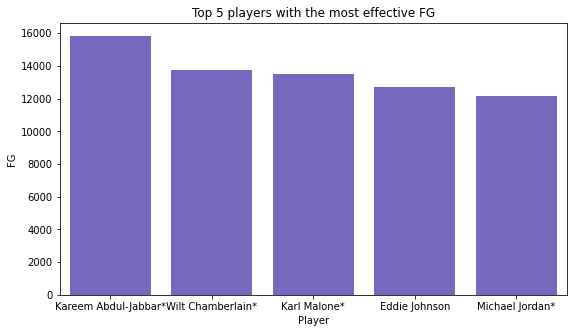

In [ ]:
#2a . Draw bar chart for ranking FG
#Innitate a figure
player_fig = plt.figure(figsize=(20,5))

#First subplot
plt.subplot(121)
sns.barplot(data=nba_temp.groupby('Player')['FG'].sum().reset_index().sort_values('FG', ascending = False).head(5), x="Player", y="FG", color='slateblue')
plt.title('Top 5 players with the most effective FG')


plt.show()

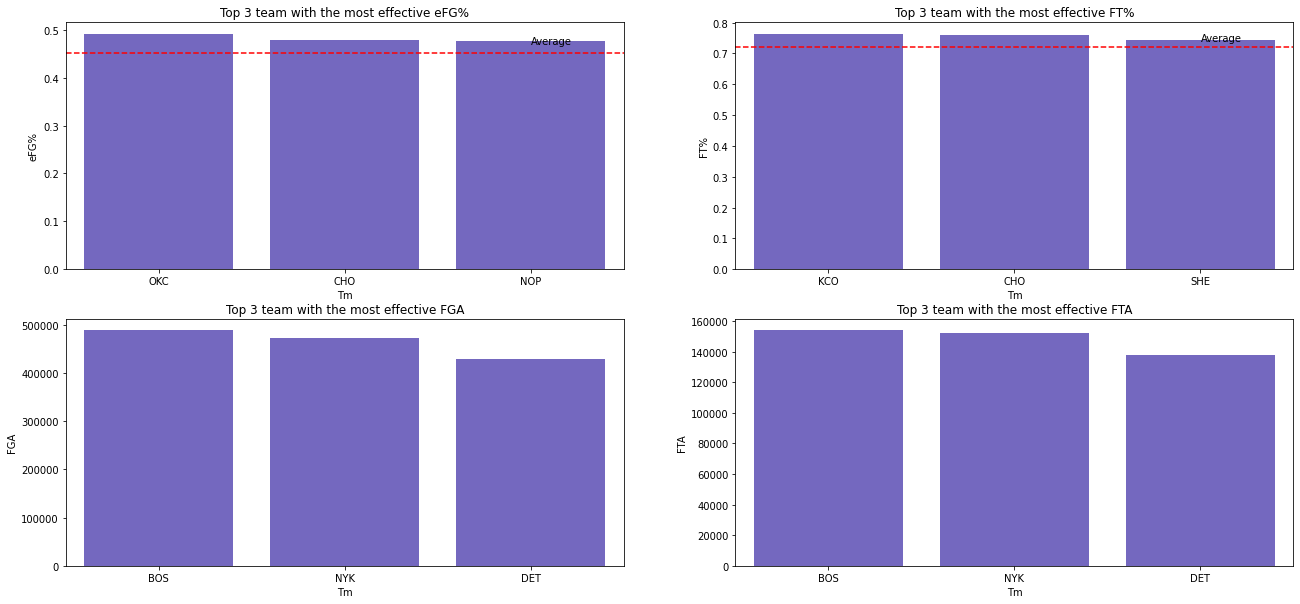

In [ ]:
#2b . Draw bar chart for ranking eFG% (for team )
#Innitate a figure
team_fig = plt.figure(figsize=(22,10))


#First subplot
plt.subplot(221)
sns.barplot(data=nba_temp[nba_temp['Tm']!= 'TOT'].groupby('Tm')['eFG%'].mean().reset_index().sort_values('eFG%',ascending= False).head(3), x="Tm", y="eFG%", color='slateblue')
plt.axhline(y=nba_temp['eFG%'].mean(), color = 'red', linestyle = '--')
plt.text(x=2, y= nba_temp['eFG%'].mean()+ 0.02, s="Average")
plt.title('Top 3 team with the most effective eFG%')

#Second subplot
plt.subplot(222)
sns.barplot(data=nba_temp[nba_temp['Tm']!='TOT'].groupby('Tm')['FT%'].mean().reset_index().sort_values('FT%',ascending= False).head(3), x="Tm", y="FT%", color='slateblue')
plt.axhline(y=nba_temp['FT%'].mean(), color = 'red', linestyle = '--')
plt.text(x=2, y= nba_temp['FT%'].mean()+ 0.02, s="Average")
plt.title('Top 3 team with the most effective FT%')

#Third subplot
plt.subplot(223)
sns.barplot(data=nba_temp[nba_temp['Tm']!='TOT'].groupby('Tm')['FGA'].sum().reset_index().sort_values('FGA',ascending= False).head(3), x="Tm", y="FGA", color='slateblue')
plt.title('Top 3 team with the most effective FGA')

#Forth subplot
plt.subplot(224)
sns.barplot(data=nba_temp[nba_temp['Tm']!='TOT'].groupby('Tm')['FTA'].sum().reset_index().sort_values('FTA',ascending= False).head(3), x="Tm", y="FTA", color='slateblue')
plt.title('Top 3 team with the most effective FTA')

plt.show()

In [ ]:
#2b . Save this figure
player_fig.savefig("top5player.png", transparent=False, dpi=80, bbox_inches="tight")
team_fig.savefig("top3team.png",transparent=False, dpi=80, bbox_inches="tight")

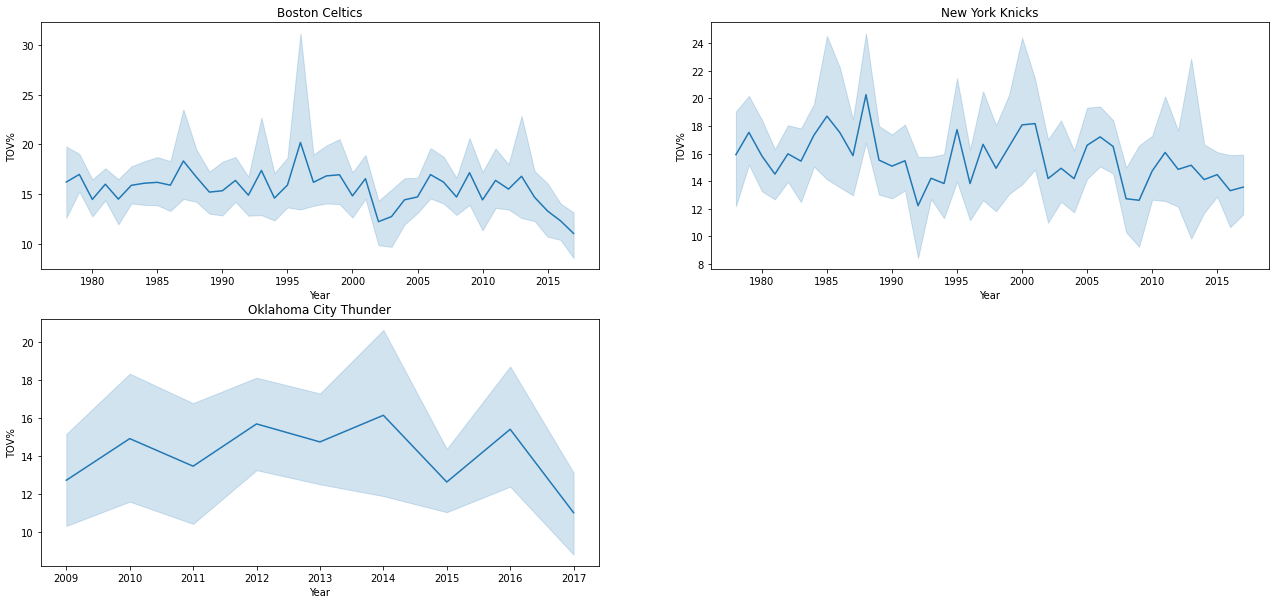

In [ ]:
#2b . Draw line chart for indicate fewer TOV% (for team )
#Innitate a figure
plt.figure(figsize=(22,10))

#First subplot
plt.subplot(221)
sns.lineplot( data = nba_temp[nba_temp['Tm'] == 'BOS'], x ='Year', y='TOV%')
plt.title('Boston Celtics')

#Second subplot
plt.subplot(222)
sns.lineplot(data = nba_temp[nba_temp['Tm'] == 'NYK'], x ='Year', y='TOV%' )
plt.title('New York Knicks')

#Third subplot
plt.subplot(223)
sns.lineplot(data = nba_temp[nba_temp['Tm'] == 'OKC'], x ='Year', y='TOV%' )
plt.title('Oklahoma City Thunder')

plt.show()

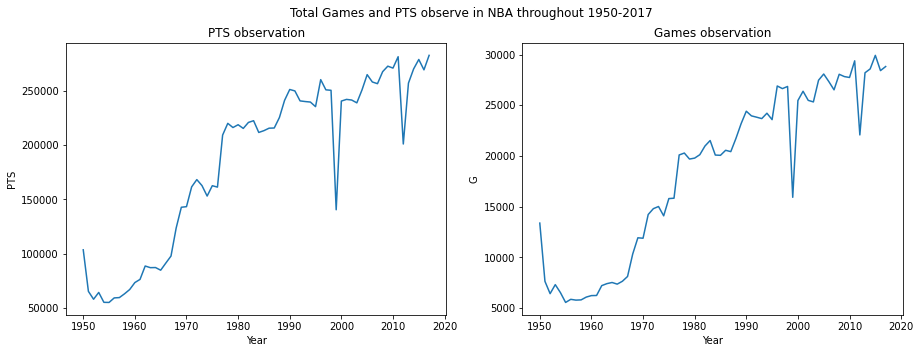

In [ ]:
#3a . Draw line chart for observation games and PTS throughout the year
#Innitate a figure
player_fig = plt.figure(figsize=(15,5))
plt.suptitle('Total Games and PTS observe in NBA throughout 1950-2017')

#First subplot - total PTS trend
plt.subplot(121)
sns.lineplot( data =nba_temp.groupby('Year')['PTS'].sum().reset_index(), x='Year', y ='PTS')
plt.title('PTS observation')


#Second subplot - total Games
plt.subplot(122)
sns.lineplot( data =nba_temp.groupby('Year')['G'].sum().reset_index(), x='Year', y ='G')
plt.title('Games observation')

plt.show()

The total amount of PTS and Games dropped significantly due to labor issues, total game was cut down , hence the drop ( https://www.nba.com/news/history-season-review-1998-99 )

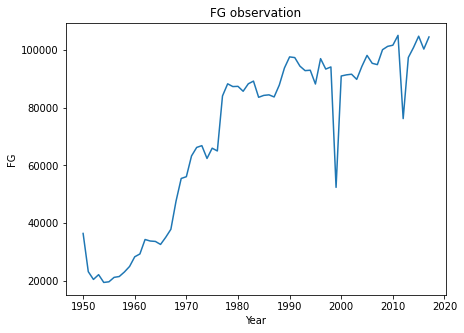

In [ ]:
#3b . Draw line chart for observation FG throughout the year
#Innitate a figure
player_fig = plt.figure(figsize=(15,5))


# total PTS trend
plt.subplot(121)
sns.lineplot( data =nba_temp.groupby('Year')['FG'].sum().reset_index(), x='Year', y ='FG')
plt.title('FG observation')

plt.show()

2. Analyzing a few notable players throughout the years who achieve the max points

In [ ]:
#1a. Create a temp table for player : nba_players
nba_players = nba_temp.melt(
    value_vars = ['Player'],
    id_vars ='FG',
    var_name = 'category',
    value_name = 'Player name'
).sort_values('FG')
nba_players.head(10)

,FG,category,Player name
11622,0.0,Player,Tod Murphy
20548,0.0,Player,DeMarre Carroll
10787,0.0,Player,Mike Smrek
13098,0.0,Player,Cuonzo Martin
20630,0.0,Player,Patrick Ewing
10796,0.0,Player,Derek Strong
24372,0.0,Player,Chris McCullough
16440,0.0,Player,Robert Archibald
13124,0.0,Player,Anthony Miller
358,0.0,Player,Ray Ellefson


In [ ]:
#1b. From the nba_players temprary table - sort values & remove 0 values
nba_players = nba_players[nba_players['FG'] != 0.0].sort_values('FG', ascending = False)
nba_players

,FG,category,Player name
1686,1597.0,Player,Wilt Chamberlain*
1806,1463.0,Player,Wilt Chamberlain*
1574,1251.0,Player,Wilt Chamberlain*
1940,1204.0,Player,Wilt Chamberlain*
3286,1159.0,Player,Kareem Abdul-Jabbar*
...,...,...,...
16023,1.0,Player,Brian Cardinal
24391,1.0,Player,Elijah Millsap
7172,1.0,Player,Jim Zoet
7298,1.0,Player,Tracy Jackson


In [ ]:
#2. Create a temp table for year : nba_year
nba_year = nba_temp.melt(
    value_vars = ['Year'],
    id_vars ='FG',
    var_name = 'category',
    value_name = 'year'
).sort_values('FG')
nba_year.head(10)

,FG,category,year
11622,0.0,Year,1994
20548,0.0,Year,2011
10787,0.0,Year,1992
13098,0.0,Year,1997
20630,0.0,Year,2011
10796,0.0,Year,1992
24372,0.0,Year,2017
16440,0.0,Year,2004
13124,0.0,Year,1997
358,0.0,Year,1951


In [ ]:
#2b. From the nba_year temporary table - sort value & remove 0 values
nba_year = nba_year[nba_year['FG'] != 0.0].sort_values('FG', ascending = False)
nba_year

,FG,category,year
1686,1597.0,Year,1962
1806,1463.0,Year,1963
1574,1251.0,Year,1961
1940,1204.0,Year,1964
3286,1159.0,Year,1972
...,...,...,...
16023,1.0,Year,2003
24391,1.0,Year,2017
7172,1.0,Year,1983
7298,1.0,Year,1984


In [ ]:
#3a. Check for duplicates
print(nba_year['FG'].duplicated().sum())
print(nba_players['FG'].duplicated().sum())

23309
23309


In [ ]:
#3b. Merge 2 tables : nba player and years to find who is the best player accordingly to the year
yearly_bestplayer = pd.merge(nba_year, nba_players, how = 'inner', left_index=True, right_index=True).drop(columns = ['category_x','FG_y','category_y']).rename(columns={'FG_x':'FG'})
yearly_bestplayer

,FG,year,Player name
1686,1597.0,1962,Wilt Chamberlain*
1806,1463.0,1963,Wilt Chamberlain*
1574,1251.0,1961,Wilt Chamberlain*
1940,1204.0,1964,Wilt Chamberlain*
3286,1159.0,1972,Kareem Abdul-Jabbar*
...,...,...,...
16023,1.0,2003,Brian Cardinal
24391,1.0,2017,Elijah Millsap
7172,1.0,1983,Jim Zoet
7298,1.0,1984,Tracy Jackson


In [ ]:
#3c. Display players accordingly to each year
yearly_bestplayer_data=yearly_bestplayer.groupby(['year'])

for key, item in yearly_bestplayer_data:
  print(yearly_bestplayer_data.get_group(key), "\n\n")

        FG  year      Player name
172  649.0  1950    George Mikan*
84   521.0  1950       Alex Groza
311  397.0  1950    Max Zaslofsky
230  394.0  1950     Jim Pollard*
18   373.0  1950       Carl Braun
..     ...   ...              ...
194    1.0  1950       Mike Novak
83     1.0  1950        Don Grate
175    1.0  1950  Murray Mitchell
156    1.0  1950      John Mandic
161    1.0  1950    Mike McCarron

[309 rows x 3 columns] 


        FG  year    Player name
427  678.0  1951  George Mikan*
368  492.0  1951     Alex Groza
408  459.0  1951   Ed Macauley*
361  429.0  1951     Joe Fulks*
320  409.0  1951    Ralph Beard
..     ...   ...            ...
459    4.0  1951  Kenny Sailors
443    3.0  1951      Don Otten
445    2.0  1951    Easy Parham
387    1.0  1951     Gene James
321    1.0  1951   Leon Blevins

[172 rows x 3 columns] 


        FG  year      Player name
486  548.0  1952     Paul Arizin*
563  545.0  1952    George Mikan*
510  512.0  1952       Bob Cousy*
581  411.0  1952  

**RESULT : Some players who keep score the most FG for consecutive years**

George Mikan* - 1950- 51

Neil Johnston* - 1953- 55

Wilt Chamberlain* - 1960- 66

Kareem Abdul-Jabbar* - 1970- 72

Bob McAdoo* - 1974- 76

George Gervin* - 1078- 80

Michael Jordan* - 1987- 93  & 1996- 98

Shaquille O'Neal* - 1999- 2000

Kobe Bryant 2006- 08






3. Analyzing what makes their best players

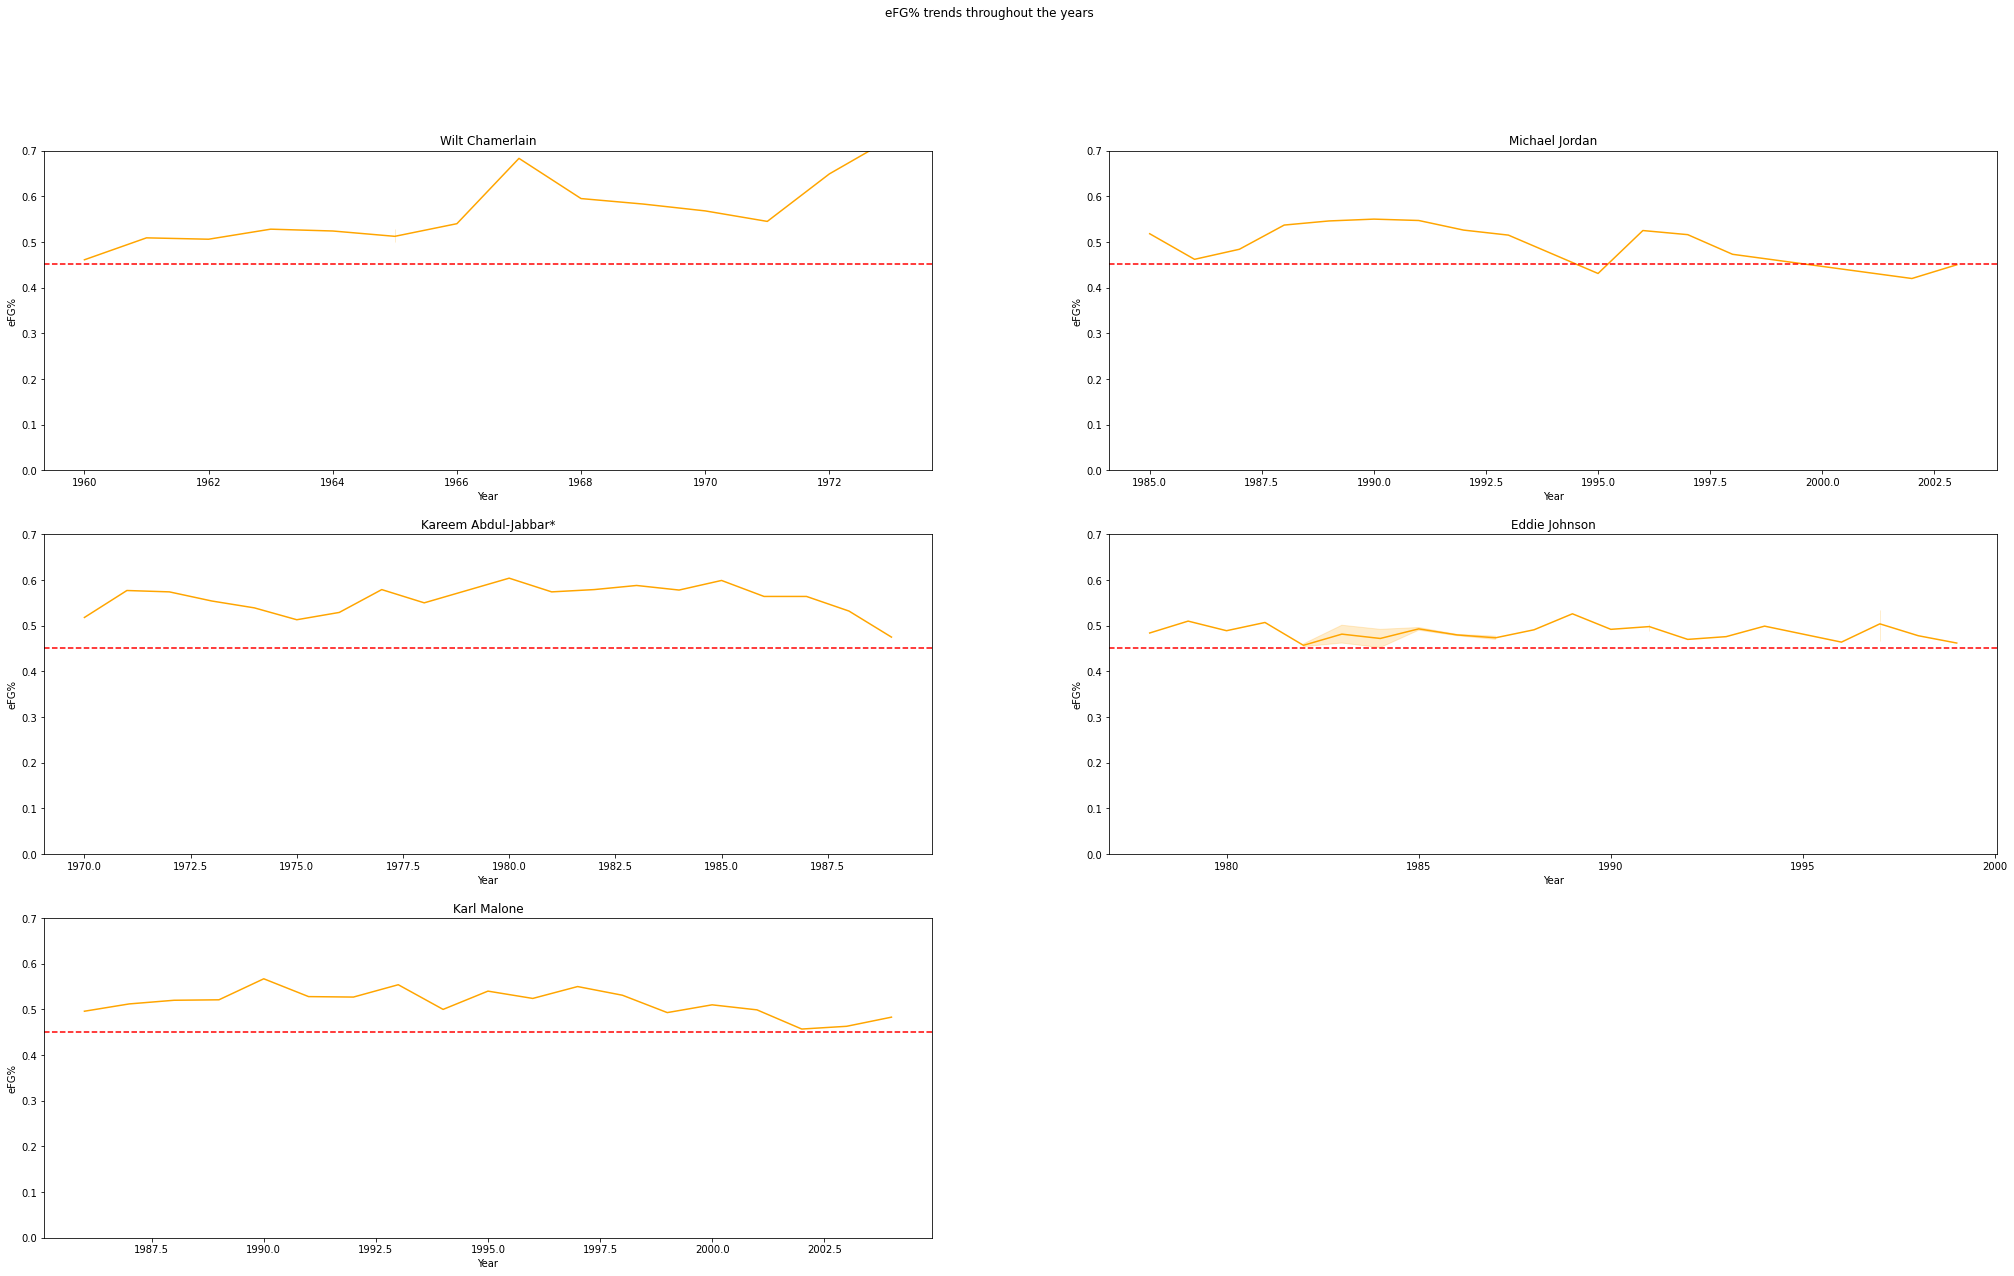

In [ ]:
#1. Analyzing on e Field Goal %
#Innitate a figure
plt.figure(figsize=(35,20))
plt.suptitle('eFG% trends throughout the years')

#First subplot
plt.subplot(321)
sns.lineplot(data= nba_temp[nba_temp['Player'] == 'Wilt Chamberlain*'], x="Year", y="eFG%", color='orange')
plt.title('Wilt Chamerlain')
plt.axhline(y=nba_temp['eFG%'].mean(), color = 'red', linestyle = '--')
plt.ylim(0,0.7)

#Second subplot
plt.subplot(322)
sns.lineplot(data=nba_temp[nba_temp['Player'] == 'Michael Jordan*'], x="Year", y="eFG%", color ='orange')
plt.title('Michael Jordan')
plt.axhline(y=nba_temp['eFG%'].mean(), color = 'red', linestyle = '--')
plt.ylim(0,0.7)

#Third subplot
plt.subplot(323)
sns.lineplot(data = nba_temp[nba_temp['Player'] == 'Kareem Abdul-Jabbar*'], x="Year", y="eFG%", color ='orange')
plt.title('Kareem Abdul-Jabbar*')
plt.axhline(y=nba_temp['eFG%'].mean(), color = 'red', linestyle = '--')
plt.ylim(0,0.7)

#Forth subplot
plt.subplot(324)
sns.lineplot(data=nba_temp[nba_temp['Player'] == 'Eddie Johnson'], x="Year", y="eFG%", color ='orange')
plt.title('Eddie Johnson')
plt.axhline(y=nba_temp['eFG%'].mean(), color = 'red', linestyle = '--')
plt.ylim(0,0.7)

#Fifth subplot
plt.subplot(325)
sns.lineplot(data=nba_temp[nba_temp['Player'] == 'Karl Malone*'], x="Year", y="eFG%", color ='orange')
plt.title('Karl Malone')
plt.axhline(y=nba_temp['eFG%'].mean(), color = 'red', linestyle = '--')
plt.ylim(0,0.7)

plt.show()

In [ ]:
nba_temp['eFG%'].mean()

0.4506758983562426

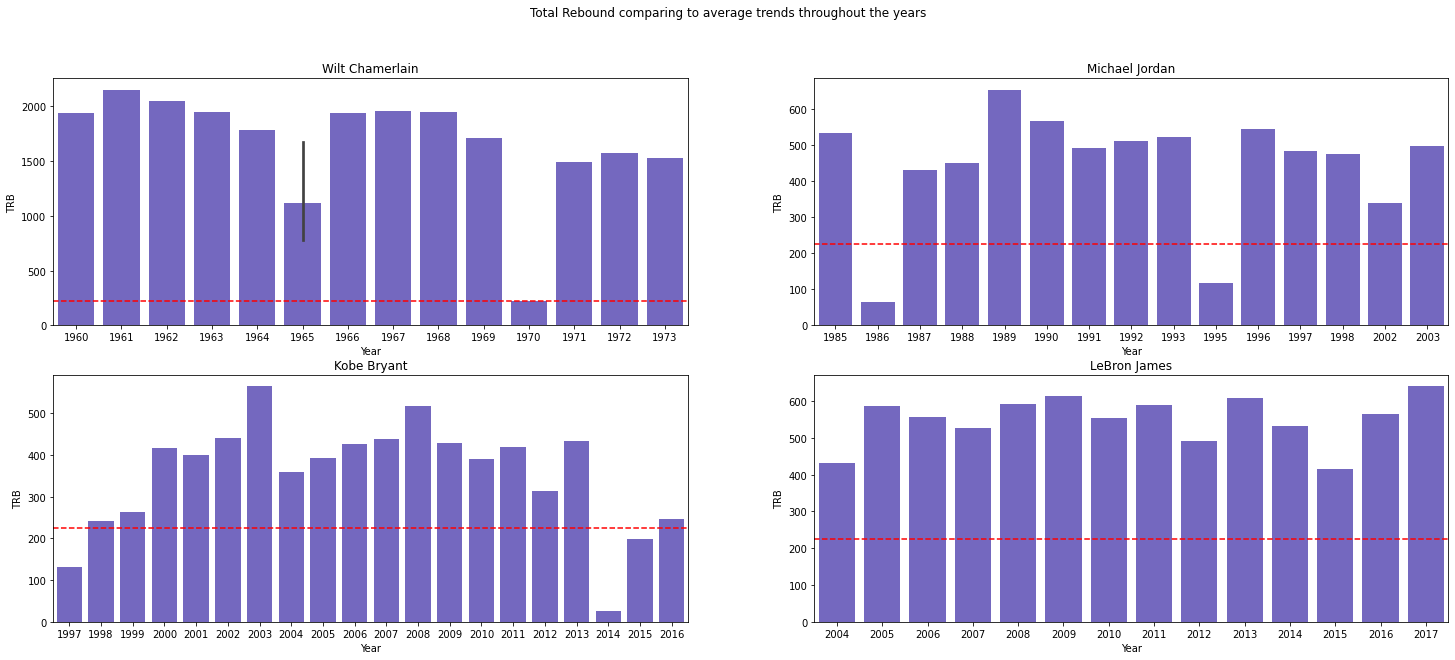

In [ ]:
#2. Analyzing on Total Rebound
#Innitate a figure
plt.figure(figsize=(25,10))
plt.suptitle('Total Rebound comparing to average trends throughout the years')

#First subplot
plt.subplot(221)
sns.barplot(data= nba_temp[nba_temp['Player'] == 'Wilt Chamberlain*'], x="Year", y="TRB", color='slateblue')
plt.title('Wilt Chamerlain')
plt.axhline(y=nba_temp['TRB'].mean(), color = 'red', linestyle = '--')


#Second subplot
plt.subplot(222)
sns.barplot(data=nba_temp[nba_temp['Player'] == 'Michael Jordan*'], x="Year", y="TRB", color ='slateblue')
plt.title('Michael Jordan')
plt.axhline(y=nba_temp['TRB'].mean(), color = 'red', linestyle = '--')


#Third subplot
plt.subplot(223)
sns.barplot(data = nba_temp[nba_temp['Player'] == 'Kobe Bryant'], x="Year", y="TRB", color ='slateblue')
plt.title('Kobe Bryant')
plt.axhline(y=nba_temp['TRB'].mean(), color = 'red', linestyle = '--')

#Forth subplot
plt.subplot(224)
sns.barplot(data=nba_temp[nba_temp['Player'] == 'LeBron James'], x="Year", y="TRB", color ='slateblue')
plt.title('LeBron James')
plt.axhline(y=nba_temp['TRB'].mean(), color = 'red', linestyle = '--')


plt.show()

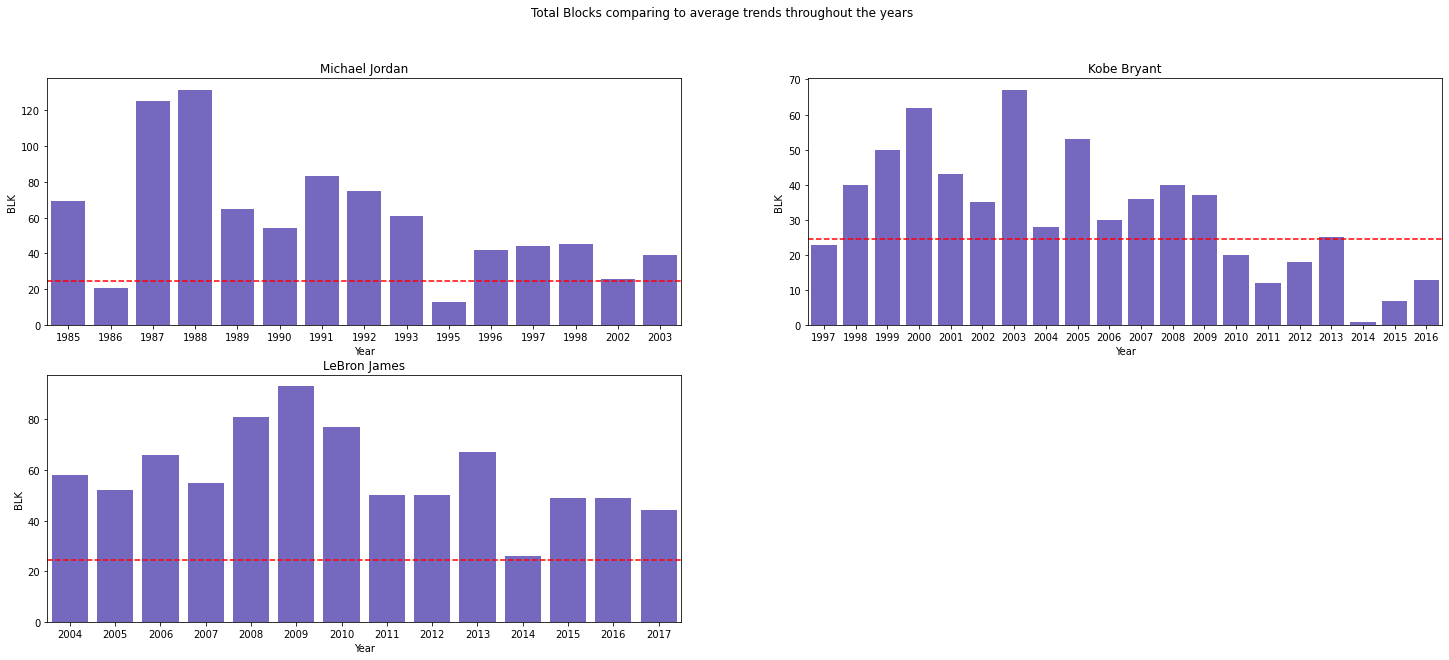

In [ ]:
#3. Analyzing on Total Blocks ( preventing a FG from opponent team )
#Innitate a figure
plt.figure(figsize=(25,10))
plt.suptitle('Total Blocks comparing to average trends throughout the years')

#First subplot
plt.subplot(221)
sns.barplot(data=nba_temp[nba_temp['Player'] == 'Michael Jordan*'], x="Year", y="BLK", color ='slateblue')
plt.title('Michael Jordan')
plt.axhline(y=nba_temp['BLK'].mean(), color = 'red', linestyle = '--')


#Second subplot
plt.subplot(222)
sns.barplot(data = nba_temp[nba_temp['Player'] == 'Kobe Bryant'], x="Year", y="BLK", color ='slateblue')
plt.title('Kobe Bryant')
plt.axhline(y=nba_temp['BLK'].mean(), color = 'red', linestyle = '--')

#Third subplot
plt.subplot(223)
sns.barplot(data=nba_temp[nba_temp['Player'] == 'LeBron James'], x="Year", y="BLK", color ='slateblue')
plt.title('LeBron James')
plt.axhline(y=nba_temp['BLK'].mean(), color = 'red', linestyle = '--')


plt.show()

4. Position Distribution Analysis

In [ ]:
#1. Counting number of different positions
nba_temp['Pos'].value_counts().reset_index().sort_values('Pos',ascending = False)

,index,Pos
0,PF,4966
1,SG,4806
2,C,4758
3,SF,4698
4,PG,4648
5,G,139
6,F,122
7,F-C,81
8,G-F,79
9,F-G,60


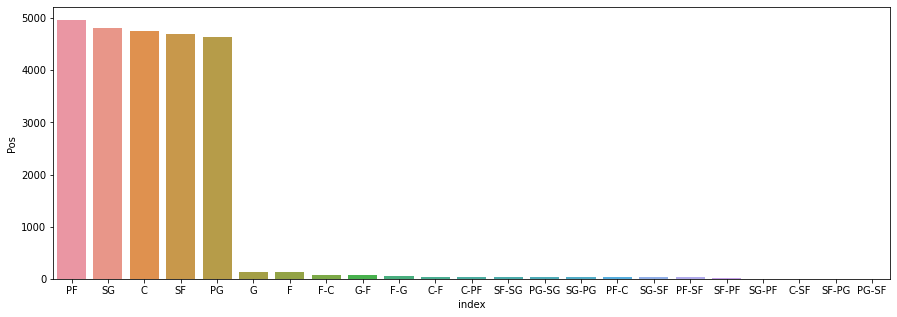

In [ ]:
#1a. Position Count for dataset
plt.figure(figsize=(15, 5))
sns.barplot(data=nba_temp['Pos'].value_counts().reset_index().sort_values('Pos',ascending = False), x="index", y = 'Pos')

plt.show()


**Implication**
*   PF : tend to rebound
*   PG , SF : creating open lanes, passing the ball, setting up for scoring opportunities
*   SG : scoring



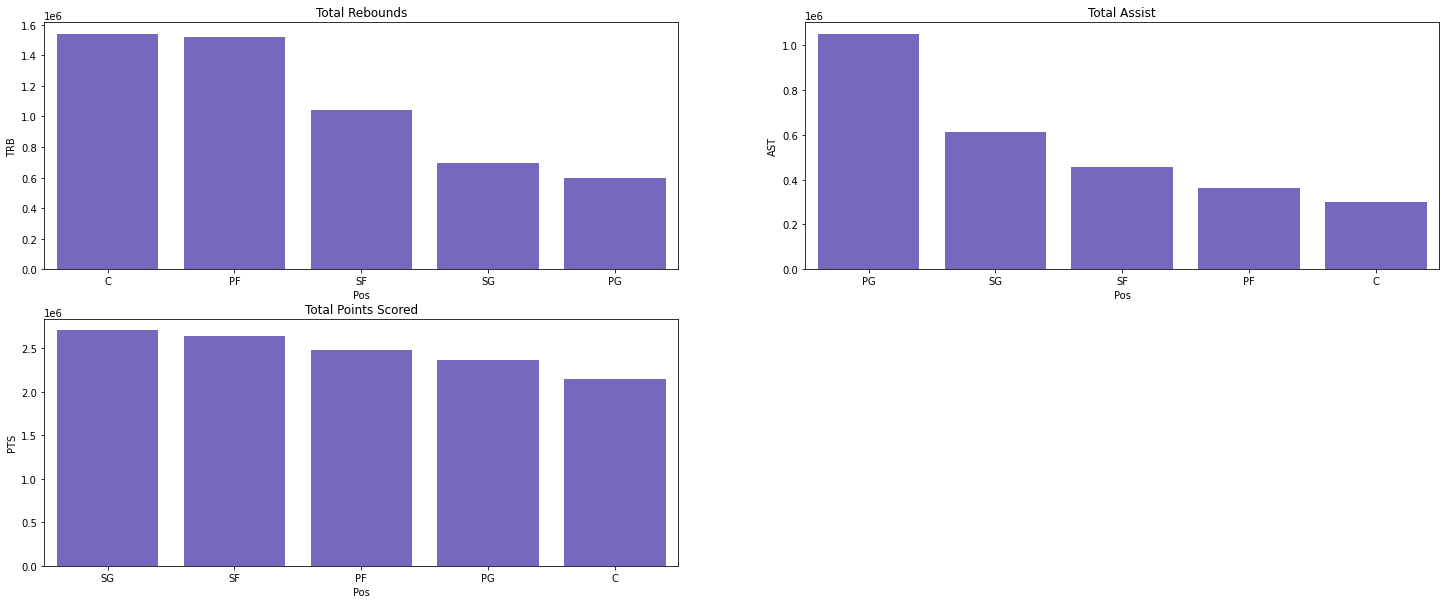

In [ ]:
#2. Analyzing what is the key responsibility for each position
#Innitate a figure
plt.figure(figsize=(25,10))
#plt.suptitle('FG% trends throughout the years')

#First subplot
plt.subplot(221)
sns.barplot(data= position_play, x="Pos", y="TRB", color='slateblue')
plt.title('Total Rebounds')


#Second subplot
plt.subplot(222)
sns.barplot(data=position_play_ast, x="Pos", y="AST", color ='slateblue')
plt.title('Total Assist')

#Third subplot
plt.subplot(223)
sns.barplot(data=position_play_score , x="Pos", y="PTS", color ='slateblue')
plt.title('Total Points Scored')
plt.show()

In [ ]:
#2a. Analyzing on Total Rebound metrics
position_play = nba_temp.groupby('Pos')['TRB'].sum().reset_index().sort_values('TRB',ascending = False).set_index('Pos').reset_index().head(5)


In [ ]:
#2b. Analyzing on Assist metrics
position_play_ast = nba_temp.groupby('Pos')['AST'].sum().reset_index().sort_values('AST', ascending = False).set_index('Pos').reset_index().head(5)


In [ ]:
#2c. Analyzing on Points metrics
position_play_score = nba_temp.groupby('Pos')['PTS'].sum().reset_index().sort_values('PTS', ascending = False).set_index('Pos').reset_index().head(5)


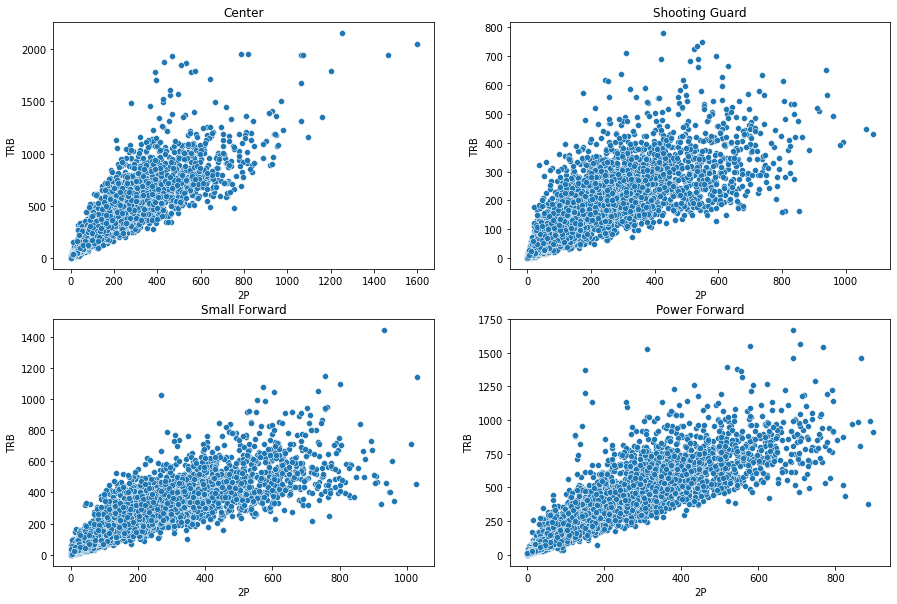

In [ ]:
#3. Analyzing the correlation amongst each position with the Rebound

#Innitate a figure
plt.figure(figsize=(15,10))


#First subplot
plt.subplot(221)
sns.scatterplot(data=nba_temp[nba_temp['Pos'] == 'C'], x="2P", y="TRB")
plt.title('Center')


#Second subplot
plt.subplot(222)
sns.scatterplot(data=nba_temp[nba_temp['Pos'] == 'SG'], x="2P", y="TRB")
plt.title('Shooting Guard')

#Third subplot
plt.subplot(223)
sns.scatterplot(data=nba_temp[nba_temp['Pos'] == 'SF'], x="2P", y="TRB")
plt.title('Small Forward')

#Forth subplot
plt.subplot(224)
sns.scatterplot(data=nba_temp[nba_temp['Pos'] == 'PF'], x="2P", y="TRB")
plt.title('Power Forward')

plt.show()

In [ ]:
#4a. Analyzing on position with the 2P & 3P scoring
PTS_stackedbar = nba_temp.groupby('Pos').sum().drop(columns = ['Year','Age','TRB%','AST%','FG%','3P%','2P%','FT%','3PA','2PA','FT','FTA','TRB','AST','G','FG','FGA','PTS','FTr','TOV%','eFG%','STL','BLK','TOV'])

<AxesSubplot:xlabel='Pos'>

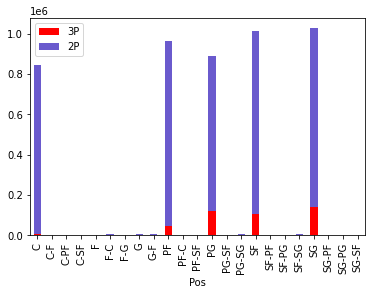

In [ ]:
#4b. Visualizing position with 2P & 3P score
PTS_stackedbar.plot(kind='bar', stacked=True, color=['red', 'slateblue']) #SG-PG more on 3Ps

5. Understanding trends

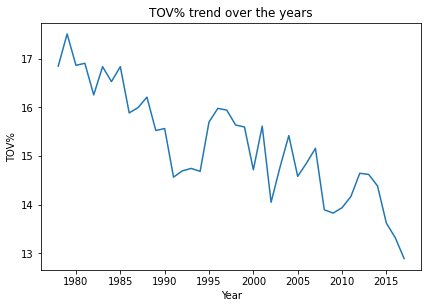

In [ ]:
#1. Visualizing the trend of Turn over rate% - meaning more shots More transition possessions, more spacing, quicker shots in the half court
#Innitate a figure
plt.figure(figsize=(15,10))


#First subplot
plt.subplot(221)
sns.lineplot(data= nba_temp.groupby('Year')['TOV%'].mean().reset_index(), x="Year", y="TOV%")
plt.title('TOV% trend over the years')

plt.show()

In [ ]:
#2.Create table for 3PA trend
threepoint_year = nba_temp[nba_temp['Year'] >1979].groupby('Year')['3PA'].sum().reset_index()
threepoint_year.head()

,Year,3PA
0,1980,5522.0
1,1981,4161.0
2,1982,4655.0
3,1983,4592.0
4,1984,4599.0


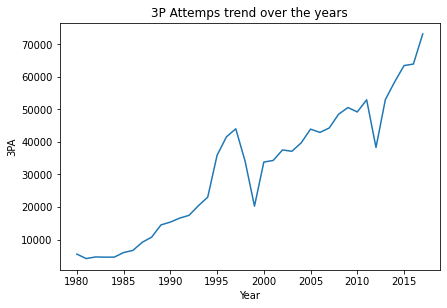

In [ ]:
#2a. Visualizing the trend of 3Points Attempt
#Innitate a figure
plt.figure(figsize=(15,10))


#First subplot
plt.subplot(221)
sns.lineplot(data=threepoint_year, x="Year", y="3PA")
plt.title('3P Attemps trend over the years')

plt.show()

In [ ]:
#2b. stephen curry datapoint
nba_temp[(nba_temp['Player'] == 'Stephen Curry')&( nba_temp['Year'] == 2016)]

,Year,Player,Pos,Age,Tm,G,FTr,TRB%,AST%,TOV%,...,eFG%,FT,FTA,FT%,TRB,AST,STL,BLK,TOV,PTS
23633,2016,Stephen Curry,PG,27,GSW,79,0.25,8.6,33.7,12.9,...,0.63,363.0,400.0,0.908,430.0,527.0,169.0,15.0,262.0,2375
